### Loading data_train.csv

1 full set, 1 feature selected

In [4]:
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving tweetsFeatures.csv to tweetsFeatures.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['dataFullClean.csv']))
data

KeyError: ignored

In [ ]:

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data[["At Least Bachelors's Degree",'White (Not Latino) Population','African American Population','Asian American Population','Total Population','Production.transportation.and.material.moving.occupations','Children.in.single.parent.households','Adult.obesity','Diabetes','Sexually.transmitted.infections']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 10), X_test shape (943, 10), y_train shape (2199, 2), y_test shape (943, 2)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data.drop(['CountyOutcome','Unnamed: 0'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 41), X_test shape (943, 41), y_train shape (2199, 2), y_test shape (943, 2)


### Keras Model Tuning using scikit_learn

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### Part 1: Tune Batch Size and Number of Epochs

In [ ]:
def create_model():
    model = Sequential()
    
    model.add(Dense(20, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    
    return model


model = KerasClassifier(build_fn=create_model)
batch_sizes = [10, 20, 40, 60]
epochs = [10, 20, 30, 40]
parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8255
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8511
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9107
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9238
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9238
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9295
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9261
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.9295
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9306
Epoch 10/10
44/44 [==============================] - 0s 864us/step - loss: 0.1598 - accuracy: 0.9273

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ccfff2160>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 40, 60],
                         'epochs': [10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9226910471916199 {'batch_size': 10, 'epochs': 10}
0.9290588140487671 {'batch_size': 10, 'epochs': 20}
0.9349741220474244 {'batch_size': 10, 'epochs': 30}
0.9336084127426147 {'batch_size': 10, 'epochs': 40}
0.9327013969421387 {'batch_size': 20, 'epochs': 10}
0.9363377571105957 {'batch_size': 20, 'epochs': 20}
0.9345185399055481 {'batch_size': 20, 'epochs': 30}
0.935424518585205 {'batch_size': 20, 'epochs': 40}
0.9163253426551818 {'batch_size': 40, 'epochs': 10}
0.9290629625320435 {'batch_size': 40, 'epochs': 20}
0.9272395968437195 {'batch_size': 40, 'epochs': 30}
0.9326993227005005 {'batch_size': 40, 'epochs': 40}
0.9176972389221192 {'batch_size': 60, 'epochs': 10}
0.9276972532272338 {'batch_size': 60, 'epochs': 20}
0.9267850518226624 {'batch_size': 60, 'epochs': 30}
0.9226972579956054 {'batch_size': 60, 'epochs': 40}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9363377571105957 {'batch_size': 20, 'epochs': 20}


### Part 2: Tune the Training Optimization Algorithm

In [ ]:
def create_model(optimizer):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20)
parameters = {'optimizer':['SGD', 'RMSprop','Adam', 'Adamax']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/20
88/88 [==============================] - 0s 976us/step - loss: 0.6190 - accuracy: 0.7527
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8459
Epoch 3/20
88/88 [==============================] - 0s 987us/step - loss: 0.4446 - accuracy: 0.8459
Epoch 4/20
88/88 [==============================] - 0s 953us/step - loss: 0.4225 - accuracy: 0.8459
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8459
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8459
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8459
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8459
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8459
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8459
Epoch 11/20
8

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ccf8fc4a8>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adam', 'Adamax']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8694812655448914 {'optimizer': 'SGD'}
0.9263346552848816 {'optimizer': 'RMSprop'}
0.9331528306007385 {'optimizer': 'Adam'}
0.920880115032196 {'optimizer': 'Adamax'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9331528306007385 {'optimizer': 'Adam'}


### Part 3: Tune Learning Rate and Momentum

Adam is an adaptive learning rate method which takes away the need to adjust learning rate, and does it automatically. Therefore we do not tune our learning rate.

### Part 4: Tune Network Weight Initialization

In [ ]:
def create_model(init_mode='uniform'):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20)
parameters = {'init_mode':['uniform', 'lecun_uniform', 'normal','glorot_uniform']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/20
88/88 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.8459
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8459
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8499
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8908
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9187
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9187
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9204
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9244
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9250
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9261
Epoch 11/20
88/88 [

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ccbd47f28>,
             iid='deprecated', n_jobs=None,
             param_grid={'init_mode': ['uniform', 'lecun_uniform', 'normal',
                                       'glorot_uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9236084222793579 {'init_mode': 'uniform'}
0.9272427082061767 {'init_mode': 'lecun_uniform'}
0.9277003645896912 {'init_mode': 'normal'}
0.9299668669700623 {'init_mode': 'glorot_uniform'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9299668669700623 {'init_mode': 'glorot_uniform'}


### Part 5: Tune the Neuron Activation Function

In [ ]:
def create_model(activation):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation=activation))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation=activation))
    
    #Note we leave activation for output as sigmoid as we want the probabilities for a binary output label
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001),activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20)
parameters = {'activation':['softmax', 'softplus','relu', 'tanh', 'sigmoid']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/20
88/88 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.7106
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.8459
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.8459
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.8459
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8459
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8459
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.8459
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8459
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8459
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8459
Epoch 11/20
88/88 [

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6cceecfba8>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['softmax', 'softplus', 'relu', 'tanh',
                                        'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8485721826553345 {'activation': 'softmax'}
0.9258780360221863 {'activation': 'softplus'}
0.9281538724899292 {'activation': 'relu'}
0.9263315439224243 {'activation': 'tanh'}
0.9195154428482055 {'activation': 'sigmoid'}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9281538724899292 {'activation': 'relu'}


### Part 6: Tune Dropout Regularization

In [ ]:
from keras.constraints import maxnorm
def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    
    model.add(Dense(20, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint),kernel_initializer='glorot_uniform' , activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20, kernel_regularizer = regularizers.l2(0.0001), kernel_constraint=maxnorm(weight_constraint), kernel_initializer='glorot_uniform' ,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20)
parameters = {'dropout_rate':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'weight_constraint':[1, 2, 3, 4, 5]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
88/88 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8466
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8625
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8960
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.9102
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9125
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9187
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9165
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9222
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9222
Epoch 11/20
88/88 [==============================] - 0s 1ms/step - loss: 0.19

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6cd3df2b70>,
             iid='deprecated', n_jobs=None,
             param_grid={'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'weight_constraint': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.9299730896949768 {'dropout_rate': 0.0, 'weight_constraint': 1}
0.9290629625320435 {'dropout_rate': 0.0, 'weight_constraint': 2}
0.9304234862327576 {'dropout_rate': 0.0, 'weight_constraint': 3}
0.9299710154533386 {'dropout_rate': 0.0, 'weight_constraint': 4}
0.9272406339645386 {'dropout_rate': 0.0, 'weight_constraint': 5}
0.930881142616272 {'dropout_rate': 0.1, 'weight_constraint': 1}
0.9276972532272338 {'dropout_rate': 0.1, 'weight_constraint': 2}
0.9276951789855957 {'dropout_rate': 0.1, 'weight_constraint': 3}
0.9258790731430053 {'dropout_rate': 0.1, 'weight_constraint': 4}
0.928151798248291 {'dropout_rate': 0.1, 'weight_constraint': 5}
0.9281538724899292 {'dropout_rate': 0.2, 'weight_constraint': 1}
0.9304255604743957 {'dropout_rate': 0.2, 'weight_constraint': 2}
0.9322437405586242 {'dropout_rate': 0.2, 'weight_constraint': 3}
0.9267881631851196 {'dropout_rate': 0.2, 'weight_constraint': 4}
0.9267881631851196 {'dropout_rate': 0.2, 'weight_constraint': 5}
0.9299730896949768 {'dropou

In [ ]:
print(clf.best_score_, clf.best_params_)

0.9331507563591004 {'dropout_rate': 0.4, 'weight_constraint': 1}


### Part 7: Tune the Number of Neurons in the Hidden Layer

In [ ]:
def create_model(neurons):
    model = Sequential()
    
    model.add(Dense(neurons, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(neurons, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=20)
parameters = {'neurons':[10,20,30,40,50]}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Epoch 1/20
88/88 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.8005
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.8459
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8459
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.8459
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8459
Epoch 6/20
88/88 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8459
Epoch 7/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8482
Epoch 8/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8607
Epoch 9/20
88/88 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8738
Epoch 10/20
88/88 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.8744
Epoch 11/20
88/88 [

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6cc5dfb6a0>,
             iid='deprecated', n_jobs=None,
             param_grid={'neurons': [10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.921786093711853 {'neurons': 10}
0.9276993274688721 {'neurons': 20}
0.9249710202217102 {'neurons': 30}
0.9313336133956909 {'neurons': 40}
0.9290650367736817 {'neurons': 50}


In [ ]:
print(clf.best_score_, clf.best_params_)

0.9313336133956909 {'neurons': 40}


### Evaluating our final tuned model

In [ ]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:

finalmodel = Sequential()

finalmodel.add(Dense(40, input_shape=(41,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel.add(Dropout(0.4))
finalmodel.add(Dense(40, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel.add(Dropout(0.4))
finalmodel.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity])
finalmodel.summary()
    
#history = finalmodel.fit(X_train, y_train, batch_size=20, epochs = 20, verbose=1)

#score = finalmodel.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

#print("Test accuracy after tuning is {}".format(score[1]))
#test validation accuracy ouput of over 0.9

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 40)                1680      
_________________________________________________________________
dropout_28 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_29 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 82        
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = finalmodel.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 20,  verbose = 1)

score = finalmodel.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))

Epoch 1/20


ValueError: ignored

In [ ]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_validate
#from sklearn.model_selection import cross_val_predict
#from sklearn.preprocessing import LabelEncoder

#scoring = ['accuracy', 'precision','f1','roc_auc']
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=4221)
#results = cross_validate(finalmodel, X, y, cv=kfold,scoring=scoring)
#y_pred = cross_val_predict(finalmodel, X, y, cv=kfold)
#conf_mat = confusion_matrix(y, y_pred)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

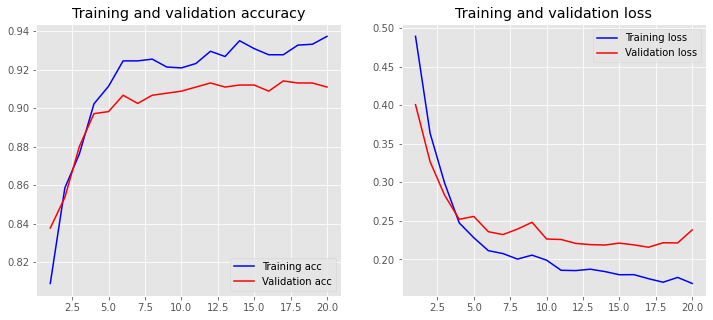

In [ ]:
plot_history(history)

# ANN with Demographic data only

In [ ]:
from sklearn.model_selection import train_test_split

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data.drop(['CountyOutcome','Unnamed: 0','tSentiment','cSentiment'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 39), X_test shape (943, 39), y_train shape (2199, 2), y_test shape (943, 2)


In [ ]:
finalmodel = Sequential()

finalmodel.add(Dense(40, input_shape=(39,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel.add(Dropout(0.4))
finalmodel.add(Dense(40, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel.add(Dropout(0.4))
finalmodel.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity])
finalmodel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 40)                1600      
_________________________________________________________________
dropout_30 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_31 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 82        
Total params: 3,322
Trainable params: 3,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = finalmodel.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 20,  verbose = 1)

score = finalmodel.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))

Epoch 1/20


ValueError: ignored

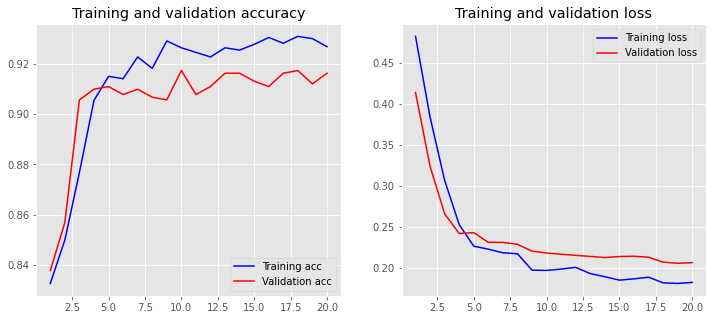

In [ ]:
plot_history(history2)

# ANN with Demographic data only feature selected

In [ ]:
data

,Unnamed: 0,CountyOutcome,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,tSentiment,cSentiment
0,0,1,0.103113,0.923631,0.436850,0.288177,0.8590,0.387625,0.831954,0.004646,0.083650,0.005855,0.108392,0.026248,0.158192,0.000000,2.433209e-04,1.000000,0.112919,0.463470,0.125194,0.552174,0.483544,0.335357,0.075214,0.427826,0.114286,0.710112,0.224719,0.109890,0.356684,0.319198,0.249047,0.229167,0.474138,0.310559,0.058300,0.585082,0.265455,0.271977,0.177474,-0.059051,-0.075890
1,1,1,0.171206,0.873199,0.210996,0.113300,0.8555,0.601213,0.398656,0.001742,0.425312,0.067916,0.256119,0.022131,0.241055,0.000000,4.682780e-05,0.818000,0.073684,0.388128,0.076983,0.473913,0.420253,0.523520,0.357265,0.187826,0.106960,0.462921,0.306081,0.281801,0.356684,0.319198,0.426938,0.378701,0.531609,0.329193,0.116776,0.645688,0.309091,0.129210,0.177474,-0.059051,-0.075890
2,2,1,0.684825,0.492795,0.087667,0.012315,0.5150,0.366759,0.095657,0.095819,0.243889,0.970726,0.090909,0.112198,0.241682,0.303297,3.029014e-04,0.917000,0.199043,0.438356,0.281493,0.000000,0.156962,0.071320,0.119658,0.137391,1.000000,0.460674,0.202247,0.307692,0.356684,0.463975,0.500635,0.731250,0.551724,0.273292,0.090651,1.000000,0.429091,0.129210,0.177474,-0.059051,-0.075890
3,3,1,0.136187,0.899135,0.378900,0.270936,0.7160,0.582521,0.634436,0.009292,0.210212,0.083138,0.131119,0.050437,0.112367,0.000000,8.942172e-04,0.389000,0.131100,0.408676,0.111975,0.498261,0.375949,0.559939,0.203419,0.332174,0.099634,0.494382,0.224719,0.164835,0.133333,0.182898,0.402795,0.379167,0.433908,0.260870,0.130144,0.517483,0.174545,0.125592,0.284610,-0.059051,-0.075890
4,4,1,0.073930,0.945245,0.352155,0.258621,0.8050,0.575652,0.701655,0.002323,0.158066,0.069087,0.177448,0.018013,0.259259,0.018681,3.832942e-04,0.264000,0.187560,0.349315,0.255054,0.490435,0.270886,0.453718,0.198291,0.448696,0.171429,0.557303,0.306081,0.281801,0.356684,0.319198,0.401399,0.378701,0.501554,0.460293,0.116776,0.347015,0.251052,0.129210,0.177474,-0.059051,-0.075890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3137,1,0.183852,0.143372,0.125557,0.216749,0.0000,0.718098,0.251293,0.000000,0.020641,0.316159,1.000000,0.005661,0.000000,0.204396,3.060641e-07,0.430494,0.075598,0.221461,0.327979,0.771304,0.475949,0.517451,0.000000,0.000000,0.060073,1.000000,0.306081,0.281801,0.356684,0.319198,0.401399,0.378701,0.324713,0.509317,0.116776,0.347015,0.251052,0.129210,0.177474,-0.046245,-0.065942
3138,3138,0,0.171206,0.873199,0.340267,0.199507,0.7680,0.492363,0.307135,0.005807,0.002716,0.526932,0.576923,0.118374,0.278092,0.197802,1.822540e-02,0.519000,0.266986,0.573059,0.290047,0.350435,0.591139,0.613050,0.071795,0.422609,0.091575,0.510112,0.247191,0.241758,0.333333,0.326207,0.505718,0.325000,0.316092,0.304348,0.101141,0.174825,0.272727,0.134302,0.149866,-0.046245,-0.065942
3139,3139,0,0.206226,0.847262,0.326895,0.201970,0.7160,0.54696

In [ ]:

num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data[["At Least Bachelors's Degree",'White (Not Latino) Population','African American Population','Asian American Population','Total Population','Production.transportation.and.material.moving.occupations','Children.in.single.parent.households','Adult.obesity','Diabetes','Sexually.transmitted.infections']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 10), X_test shape (943, 10), y_train shape (2199, 2), y_test shape (943, 2)


In [ ]:
finalmodel2 = Sequential()

finalmodel2.add(Dense(40, input_shape=(10,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel2.add(Dropout(0.4))
finalmodel2.add(Dense(40, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel2.add(Dropout(0.4))
finalmodel2.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity])
finalmodel2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 40)                440       
_________________________________________________________________
dropout_32 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_33 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 82        
Total params: 2,162
Trainable params: 2,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = finalmodel2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 20,  verbose = 1)

score = finalmodel2.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel2.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))

Epoch 1/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9359 - f1_m: 0.9356 - precision_m: 0.9348 - recall_m: 0.9364 - specificity: 0.9345 - val_loss: 0.2010 - val_accuracy: 0.9173 - val_f1_m: 0.9124 - val_precision_m: 0.9120 - val_recall_m: 0.9128 - val_specificity: 0.9118
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9281 - f1_m: 0.9289 - precision_m: 0.9283 - recall_m: 0.9295 - specificity: 0.9281 - val_loss: 0.2016 - val_accuracy: 0.9194 - val_f1_m: 0.9152 - val_precision_m: 0.9134 - val_recall_m: 0.9170 - val_specificity: 0.9128
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9318 - f1_m: 0.9307 - precision_m: 0.9302 - recall_m: 0.9313 - specificity: 0.9300 - val_loss: 0.2025 - val_accuracy: 0.9194 - val_f1_m: 0.9149 - val_precision_m: 0.9149 - val_recall_m: 0.9149 - val_specificity: 0.9149
Epoch 4/20
110/110 [==============================] - 0s 2

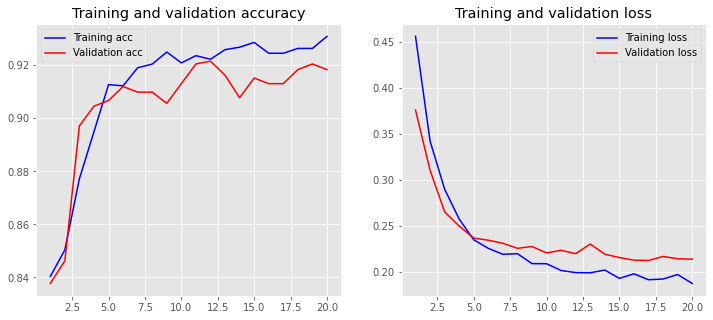

In [ ]:
plot_history(history3)

ANN with features selected data + sentiment

In [ ]:
num_classes=2
y=data['CountyOutcome'].values.tolist()
y = keras.utils.to_categorical(y, num_classes)
X = data[["At Least Bachelors's Degree",'White (Not Latino) Population','African American Population','Asian American Population','Total Population','Production.transportation.and.material.moving.occupations','Children.in.single.parent.households','Adult.obesity','Diabetes','Sexually.transmitted.infections','tSentiment','cSentiment']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle =True, random_state=4221)
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (2199, 12), X_test shape (943, 12), y_train shape (2199, 2), y_test shape (943, 2)


In [ ]:
finalmodel2 = Sequential()

finalmodel2.add(Dense(40, input_shape=(12,), kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' , activation='relu'))
finalmodel2.add(Dropout(0.4))
finalmodel2.add(Dense(40, kernel_regularizer = regularizers.l2(0.0001), kernel_initializer='glorot_uniform' ,activation='relu'))
finalmodel2.add(Dropout(0.4))
finalmodel2.add(Dense(num_classes,  kernel_regularizer = regularizers.l2(0.0001), activation='sigmoid'))
finalmodel2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m, specificity])
finalmodel2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 40)                520       
_________________________________________________________________
dropout_46 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_47 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 2)                 82        
Total params: 2,242
Trainable params: 2,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = finalmodel2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 20,  verbose = 1)

score = finalmodel2.evaluate(X_test, y_test, batch_size = 20, verbose = 1)

loss, accuracy, f1_score, precision, recall, specificity = finalmodel2.evaluate(X_test, y_test, verbose=1)

print("Test accuracy is {}".format(score[1]))
print("Test f1 score is {}".format(f1_score))
print("Test precision is {}".format(precision))
print("Test sensitivity is {}".format(recall))
print("Test specificity is {}".format(specificity))

Epoch 1/20
110/110 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.8186 - f1_m: 0.8204 - precision_m: 0.8041 - recall_m: 0.8426 - specificity: 0.7749 - val_loss: 0.3940 - val_accuracy: 0.8378 - val_f1_m: 0.8288 - val_precision_m: 0.8288 - val_recall_m: 0.8288 - val_specificity: 0.8288
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8622 - f1_m: 0.8631 - precision_m: 0.8580 - recall_m: 0.8686 - specificity: 0.8558 - val_loss: 0.3284 - val_accuracy: 0.8611 - val_f1_m: 0.8517 - val_precision_m: 0.8488 - val_recall_m: 0.8549 - val_specificity: 0.8476
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8913 - f1_m: 0.8892 - precision_m: 0.8835 - recall_m: 0.8954 - specificity: 0.8809 - val_loss: 0.2768 - val_accuracy: 0.8897 - val_f1_m: 0.8864 - val_precision_m: 0.8831 - val_recall_m: 0.8899 - val_specificity: 0.8816
Epoch 4/20
110/110 [==============================] - 0s 2

In [ ]:
from sklearn.metrics import confusion_matrix

pred = finalmodel2.predict(X_test)
pred = (pred > 0.5) 
conf = confusion_matrix(y_test, pred)

import seaborn as sns
sns.heatmap(conf, annot=True)


ValueError: ignored

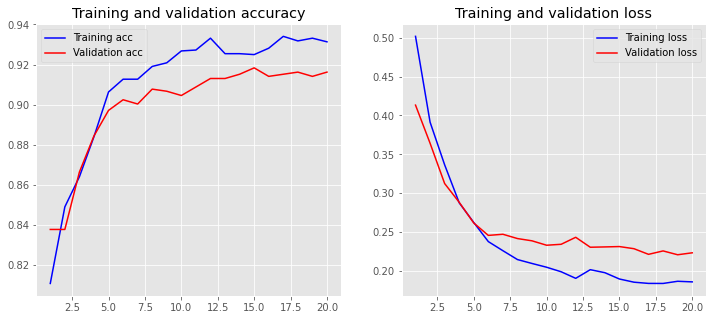

In [ ]:
plot_history(history4)